## Module 6. Network Models

Network models can be very useful for comparing their topology to the structural properties of our network built from real data. Different network models have very distinct structural characteristics, which defines their behavior in case of information flow on the network, attacks/failures on the nodes/edges, etc, and these properties have been extensively studied and are well documented. Knowing to which network model your graph corresponds to can provide valuable insights about its potential behavior under various circumstances.

There are a miriad of network models with different topological properties. Here we will try out some of the most useful ones (that frequently occur in real complex systems). 

For more network generation classes: https://networkx.github.io/documentation/networkx-1.10/reference/generators.html

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter

import networkx as nx
import nxviz as nv

%matplotlib inline

In [2]:
def degree_distr(net):
    degrees = dict(net.degree()) 
    hist = list(Counter(degrees.values()).items()) 
    hist.sort(key=lambda x:x[0])
    hist = np.array(hist)
    return hist

In [3]:
# Barabasi-Albert (scale-free) network 
ba = nx.barabasi_albert_graph(50, 3)

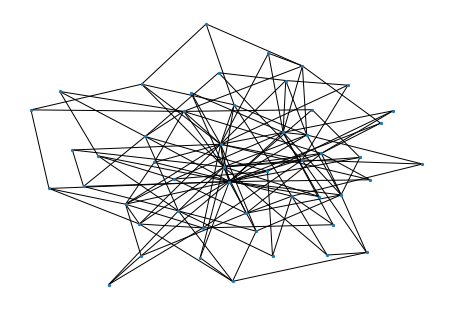

In [4]:
nx.draw(ba, node_size=5)

Text(0.5,1,'Barabasi-Albert Model')

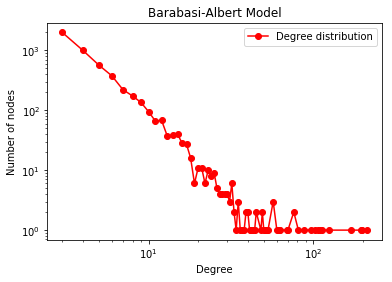

In [5]:
# create large graph
ba = nx.barabasi_albert_graph(5000, 3)

# get degree distribution
dd = degree_distr(ba)

# plot degree distribution
plt.figure()
plt.loglog(dd.T[0],dd.T[1],'ro-')
plt.legend(['Degree distribution'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Barabasi-Albert Model')

In [6]:
# Erdos-Renyi (random) network 
er = nx.erdos_renyi_graph(50, 0.1)

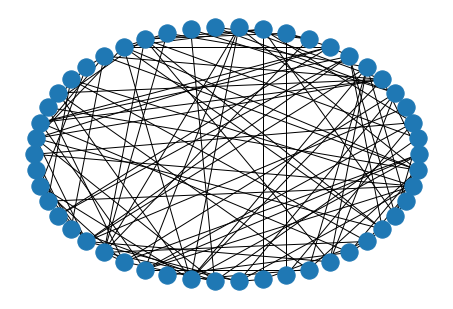

In [7]:
nx.draw_circular(er)

Text(0.5,1,'Erdos-Renyi Model')

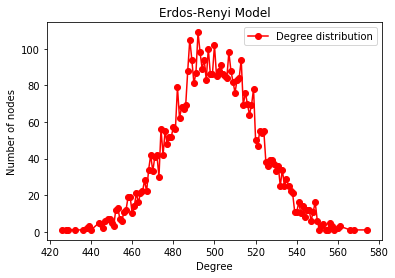

In [8]:
# create large graph
er = nx.erdos_renyi_graph(5000, 0.1)

# get degree distribution
dd = degree_distr(er)

# plot degree distribution
plt.figure()
plt.plot(dd.T[0],dd.T[1],'ro-')
plt.legend(['Degree distribution'])
plt.xlabel('Degree')
plt.ylabel('Number of nodes')
plt.title('Erdos-Renyi Model')

In [9]:
# Watts-Strogatz (small-world) network 
ws = nx.watts_strogatz_graph(50, 6, 0.2)

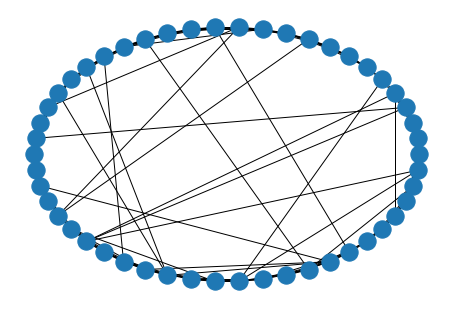

In [10]:
nx.draw_circular(ws)

Text(0.5,1,'Watts-Strogatz Model')

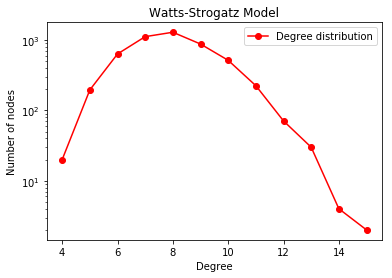

In [11]:
# create large graph
ws = nx.watts_strogatz_graph(5000, 8, 0.4)

# get degree distribution
dd = degree_distr(ws)

# plot degree distribution
fig, ax = plt.subplots(1)
ax.plot(dd.T[0],dd.T[1],'ro-')
ax.set_yscale('log')
ax.legend(['Degree distribution'])
ax.set_xlabel('Degree')
ax.set_ylabel('Number of nodes')
ax.set_title('Watts-Strogatz Model')

In [12]:
# random geometric graph (RGG)
rgg = nx.random_geometric_graph(200, 0.125)

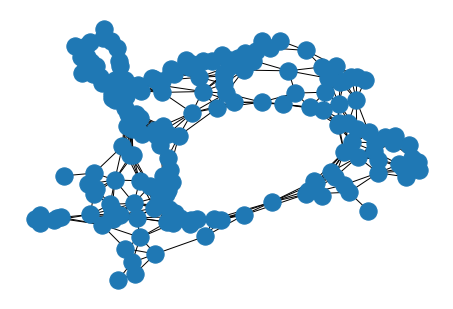

In [13]:
nx.draw(rgg)

In [14]:
rgg = nx.random_geometric_graph(200, 0.2)


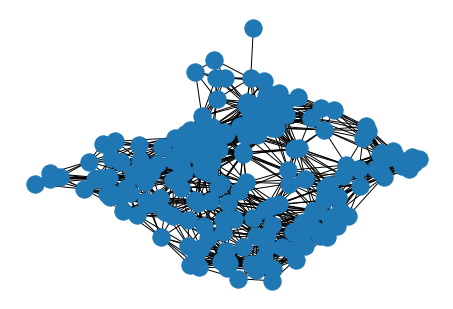

In [15]:
nx.draw(rgg)

Text(0.5,1,'Random Geometric Graph')

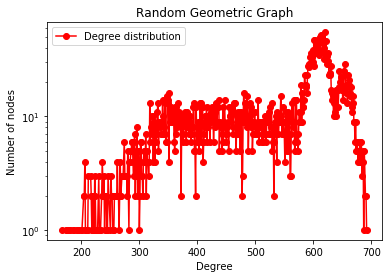

In [16]:
# create large graph
rgg = nx.random_geometric_graph(5000, 0.2)

# get degree distribution
dd = degree_distr(rgg)

# plot degree distribution
fig, ax = plt.subplots(1)
ax.plot(dd.T[0],dd.T[1],'ro-')
ax.set_yscale('log')
ax.legend(['Degree distribution'])
ax.set_xlabel('Degree')
ax.set_ylabel('Number of nodes')
ax.set_title('Random Geometric Graph')

In [17]:
# complete graph (every pair of nodes is connected)
complete = nx.complete_graph(6)

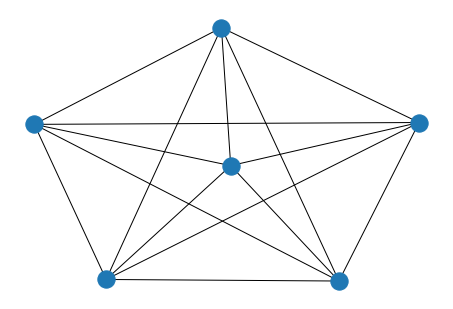

In [18]:
nx.draw(complete)

In [19]:
# create degree sequence from desired degree distribution
sequence = nx.random_powerlaw_tree_sequence(100, tries=5000)
G = nx.configuration_model(sequence)

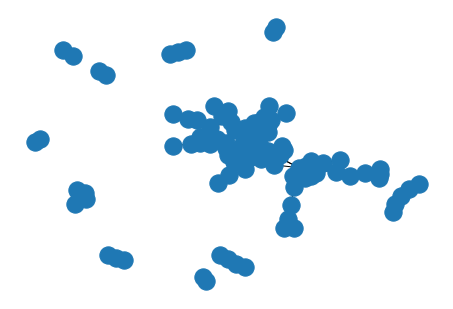

In [20]:
nx.draw(G)

In [21]:
# generate degree sequence from custom list
D = [2, 3, 4, 6, 5]
G = nx.configuration_model(D, create_using=nx.Graph())

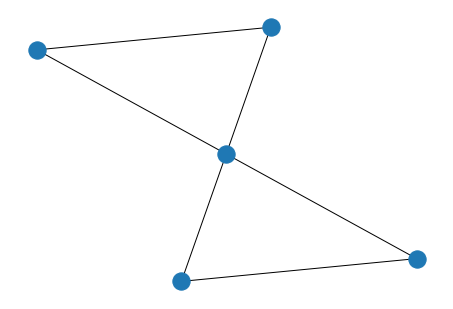

In [22]:
nx.draw(G)

In [24]:
# generate degree sequence from real network
K = nx.karate_club_graph()
r = [d for i, d in K.degree()]
G = nx.configuration_model(r, create_using=nx.Graph())

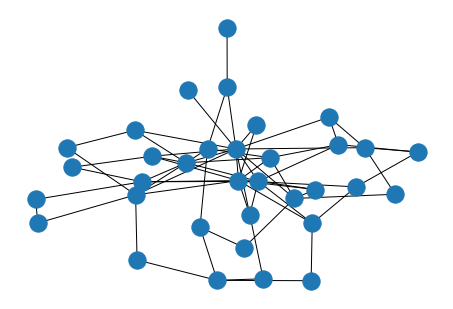

In [25]:
nx.draw(G)

In [26]:
# remove self-loops
G.remove_edges_from(nx.selfloop_edges(G))